## English/French Translator: Long Short Term Memory Networks

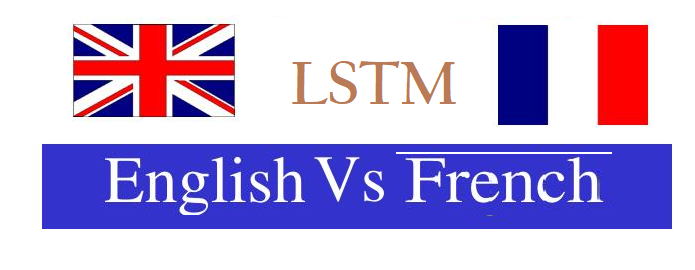

In [76]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
# Logging
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
df_english = pd.read_csv("small_vocab_en.csv",sep = '\t' , names = ['english'])
df_french = pd.read_csv("small_vocab_fr.csv",sep = '\t' , names = ['french'])

In [4]:
print("df_english info :- ",df_english.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
df_english info :-  None


In [5]:
print("df_french info :- ",df_french.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB
df_french info :-  None


In [6]:
df = pd.concat([df_english,df_french],1)

In [7]:
df.head()

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [8]:
print("Total English records : ", df_english.shape[0])
print("Total French records : ", df_french.shape[0])

Total English records :  137860
Total French records :  137860


In [9]:
import string
def msg_clean(msg):
    clean =  [(char) for char in msg if char not in string.punctuation]
    clean = "".join(clean)
    return clean

In [10]:
df['french'] = df['french'].apply(msg_clean)

In [11]:
df['english'] = df['english'].apply(msg_clean)

In [19]:
df['english'].head()

0    new jersey is sometimes quiet during autumn  a...
1    the united states is usually chilly during jul...
2    california is usually quiet during march  and ...
3    the united states is sometimes mild during jun...
4    your least liked fruit is the grape  but my le...
Name: english, dtype: object

## DATA CLEANING

In [12]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
english_words = []
french_words  = []

In [15]:
def get_unique_word(x,word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)

In [24]:
df['english'].apply(lambda x : get_unique_word( x, english_words))
df['french'].apply(lambda x : get_unique_word( x, french_words))

0         None
1         None
2         None
3         None
4         None
          ... 
137855    None
137856    None
137857    None
137858    None
137859    None
Name: french, Length: 137860, dtype: object

In [25]:
english_words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'they',
 'pears',
 'she',
 'little',
 'red',

In [26]:
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'étatsunis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 'lorange',
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 'naime',
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 'lautomne',
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'mangue

In [27]:
print("Total lenth of English words : ", len(english_words))
print("Total lenth of french  words : ", len(french_words))

Total lenth of English words :  199
Total lenth of french  words :  345


In [28]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [36]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [37]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [38]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [39]:
english_words

['is',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'favorite',
 'least',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'lemons',
 'grapes',
 'mangoes',
 'apples',
 'peaches',
 'oranges',
 'pears',
 'strawberries',
 'bananas',
 'to',
 'grape',
 'apple',
 'orange',
 'lemon',
 'lime',
 'banana',
 'mango',
 'pear',
 'strawberry',
 'peach',
 'like',
 'dislike',
 'they',
 'that',
 'i',
 'we',


In [40]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

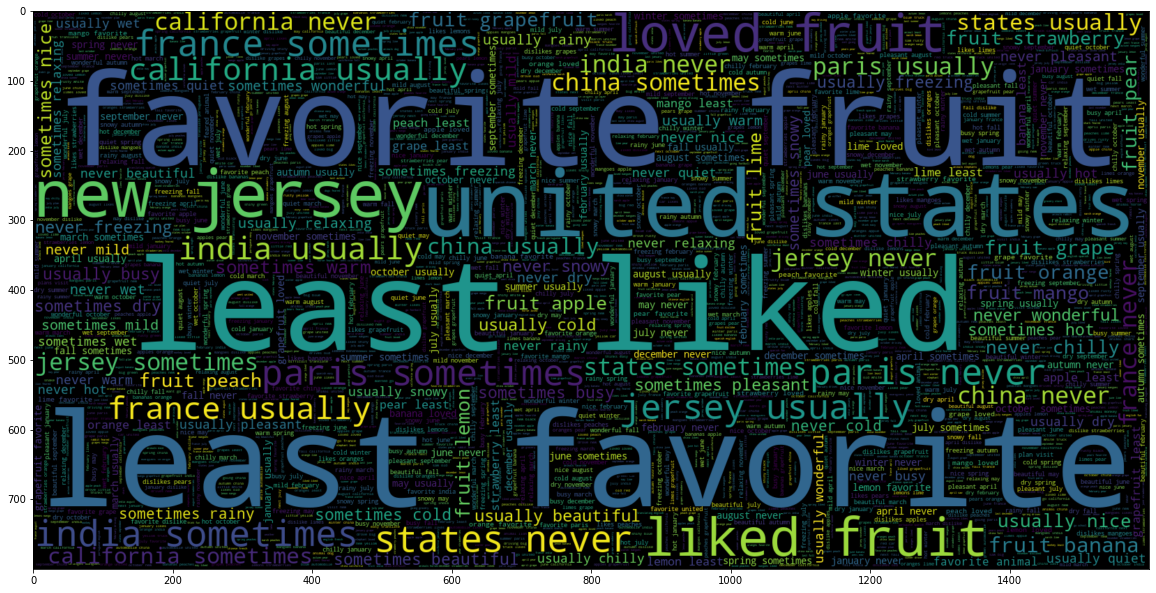

In [41]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [42]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [44]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = 0
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [45]:
maxlen_french = 0
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french  = len(tokens)
print("The maximum number of words in any document  = " , maxlen_french)

The maximum number of words in any document  =  21


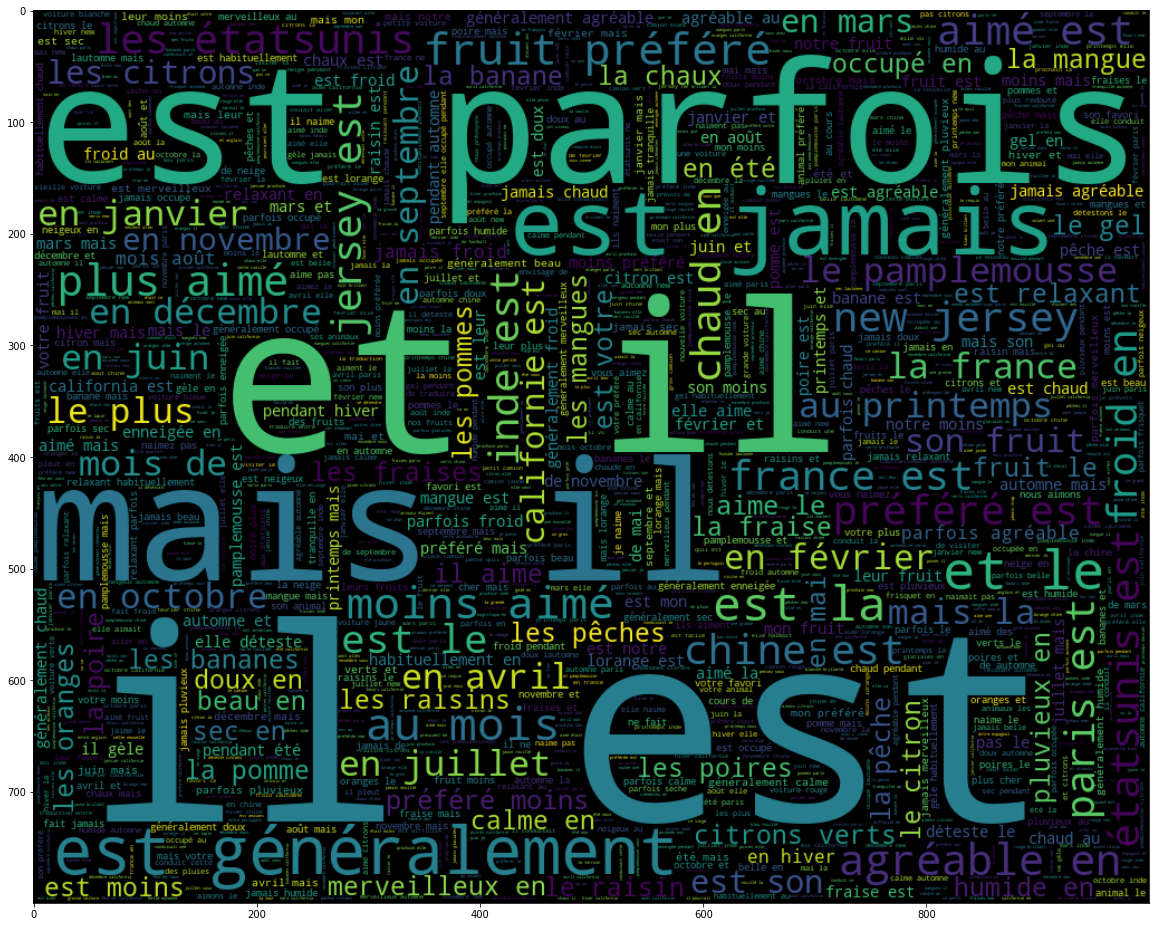

In [46]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000 , width=1000 , height=800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

### Prepare the Data by Performing Tokenization and Padding

In [50]:
def tokenize_and_pad(x, maxlen):
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [51]:
# tokenize and padding to the data 
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen_french)

In [53]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = len(english_words) + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [60]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = len(french_words) + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 346


In [55]:
print("The tokenized version for documents \n" , df.english[-1:].item() , "\n is :", x_padded[-1:])

The tokenized version for documents 
 the orange is her favorite fruit  but the banana is your favorite  
 is : [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [57]:
print("The tokenized version for documents \n" , df.french[-1:].item() , "\n is :", y_padded[-1:])

The tokenized version for documents 
 lorange est son fruit préféré  mais la banane est votre favori  
 is : [[83  1 20 16 17  5  7 86  1 39 92  0  0  0  0  0  0  0  0  0  0]]


In [58]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test  =  train_test_split(x_padded , y_padded  ,test_size = 0.1)

In [62]:
from tensorflow.keras.optimizers import Adam

In [89]:
x_train[7]

array([26, 70, 28, 73,  7, 76,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [63]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(english_vocab_size, 128, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer = Adam(lr = 1e-3), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 128)           25600     
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               394240    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 21, 256)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 21, 256)           525312    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 21, 346)           88922     
Total params: 1,034,074
Trainable params: 1,034,074
Non-trainable params: 0
_________________________________________________________________


In [64]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 21, 1)

In [66]:
epochs = 10
history =model.fit(x_train , y_train , batch_size= 1024 , validation_split=0.1 , epochs =epochs)

Epoch 1/10
110/110 [==============================] - 302s 3s/step - loss: 1.4278 - accuracy: 0.6131 - val_loss: 1.3785 - val_accuracy: 0.6184
Epoch 2/10
110/110 [==============================] - 302s 3s/step - loss: 1.2438 - accuracy: 0.6492 - val_loss: 1.1526 - val_accuracy: 0.6749
Epoch 3/10
110/110 [==============================] - 303s 3s/step - loss: 1.0879 - accuracy: 0.6895 - val_loss: 1.0333 - val_accuracy: 0.7023
Epoch 4/10
110/110 [==============================] - 303s 3s/step - loss: 0.9694 - accuracy: 0.7176 - val_loss: 1.0257 - val_accuracy: 0.7023
Epoch 5/10
110/110 [==============================] - 304s 3s/step - loss: 0.8825 - accuracy: 0.7401 - val_loss: 0.9412 - val_accuracy: 0.7251
Epoch 6/10
110/110 [==============================] - 302s 3s/step - loss: 0.7969 - accuracy: 0.7650 - val_loss: 0.7885 - val_accuracy: 0.7647
Epoch 7/10
110/110 [==============================] - 301s 3s/step - loss: 0.7357 - accuracy: 0.7823 - val_loss: 0.7078 - val_accuracy: 0.7877

In [67]:
# save the model
model.save("weights.h5")

In [68]:
y_pred =  model.predict(x_test)

In [71]:
g=2

In [73]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [80]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [81]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - he likes lemons peaches and grapes         

Original French word - il aime les citrons les pêches et les raisins            

Predicted French word - il aime les poires les poires et les raisins            




Original English word - paris is sometimes wet during winter but it is usually snowy in may  

Original French word - paris est parfois humide pendant l hiver mais il est généralement enneigée en mai       

Predicted French word - paris est généralement agréable pendant l hiver mais il est jamais en en mai       




Original English word - china is never pleasant during july but it is nice in winter   

Original French word - chine est jamais agréable en juillet mais il est agréable en hiver         

Predicted French word - chine est jamais agréable en juillet mais il est agréable en hiver         




Original English word - the united states is sometimes pleasant during july but it is usually relaxing in spring

Original French word - les étatsunis 